In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv(r'D:\certisured ML\Machine Learning\k means clustering\Mall_Customers.csv')

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [8]:
df.shape

(200, 5)

In [9]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [14]:
num = df.select_dtypes(include=['int','float']).columns.tolist()
num.remove('CustomerID')
num

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [15]:
df.describe().T.style.background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.000000,100.500000,57.879185,1.000000,50.750000,100.500000,150.250000,200.000000
Age,200.000000,38.850000,13.969007,18.000000,28.750000,36.000000,49.000000,70.000000
Annual Income (k$),200.000000,60.560000,26.264721,15.000000,41.500000,61.500000,78.000000,137.000000
Spending Score (1-100),200.000000,50.200000,25.823522,1.000000,34.750000,50.000000,73.000000,99.000000


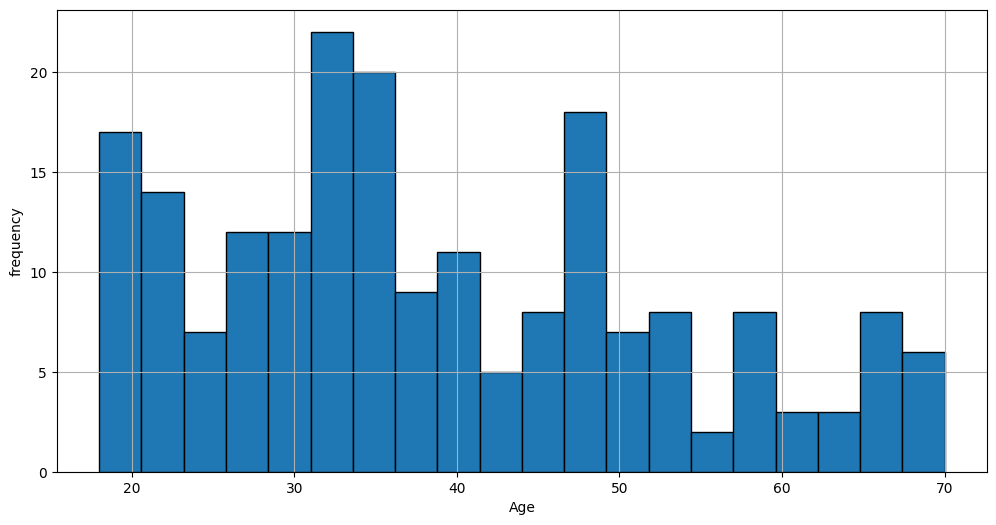

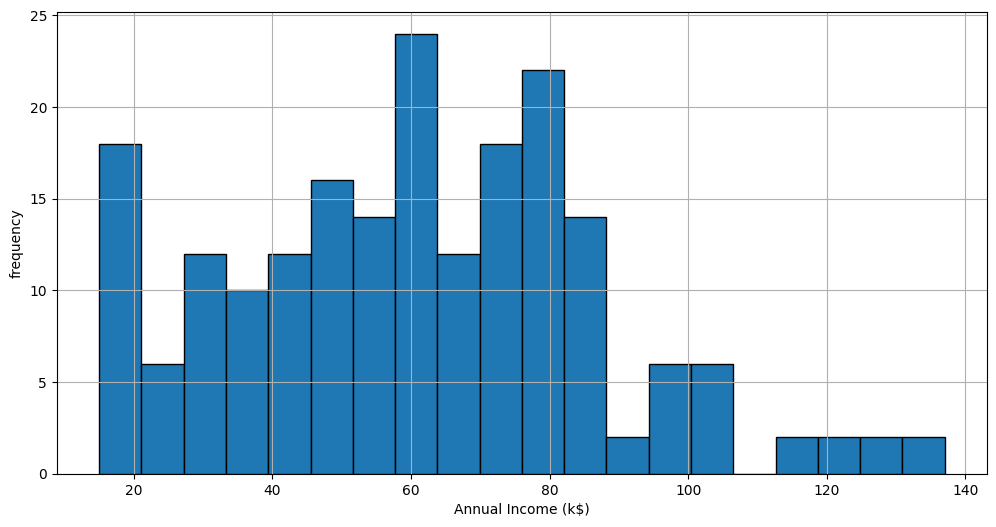

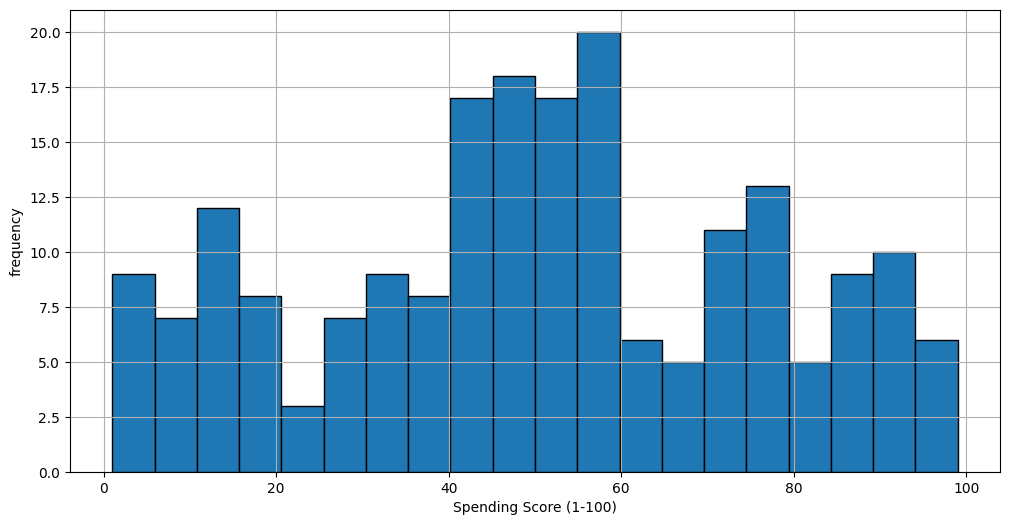

In [16]:
for col in num:
    plt.figure(figsize=(12,6))
    df[col].hist(bins=20,edgecolor='black')

    plt.ylabel('frequency')
    plt.xlabel(col)
    plt.show()

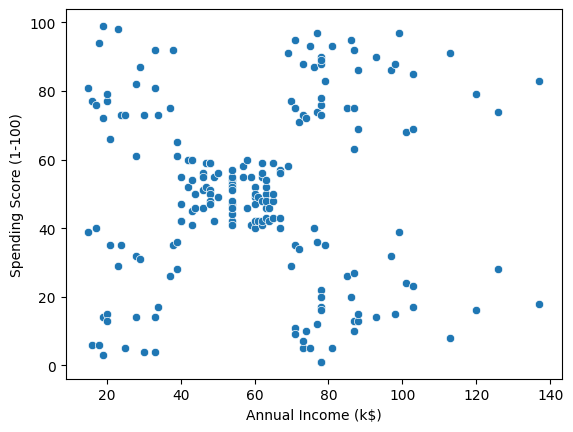

In [17]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)
plt.show()

In [18]:
x = df[['Annual Income (k$)','Spending Score (1-100)']]

In [19]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [20]:
sse = []#sum of square errorr
for k in range(1,11):
    km = KMeans(n_clusters=k,random_state=42)
    km.fit(x)
    sse.append(km.inertia_)


In [21]:
sse

[269981.28,
 183653.32894736843,
 106348.37306211122,
 73880.64496247195,
 44448.4554479337,
 40825.16946386947,
 33642.57922077923,
 26686.83778518779,
 24766.471609793443,
 23103.122085983916]

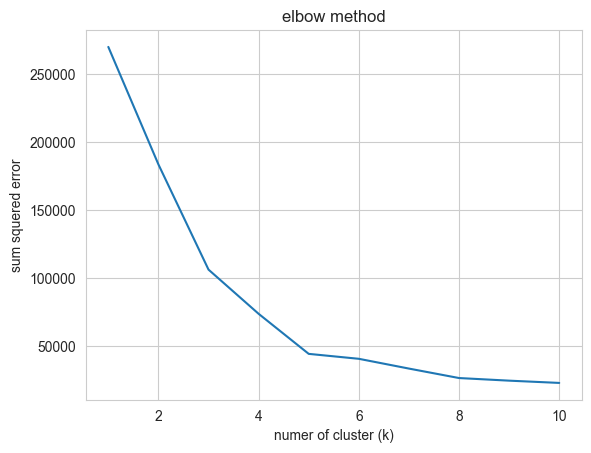

In [22]:
sns.set_style('whitegrid')
plt.plot(range(1,11),sse)
plt.xlabel('numer of cluster (k)')
plt.ylabel('sum squered error')
plt.title('elbow method')
plt.show()

In [23]:
Kmeans = KMeans(n_clusters=5,random_state=42) #init ='k-means++'
Kmeans.fit(x)

KMeans(n_clusters=5, random_state=42)

In [24]:
Kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [25]:
pred = Kmeans.predict(x)
pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

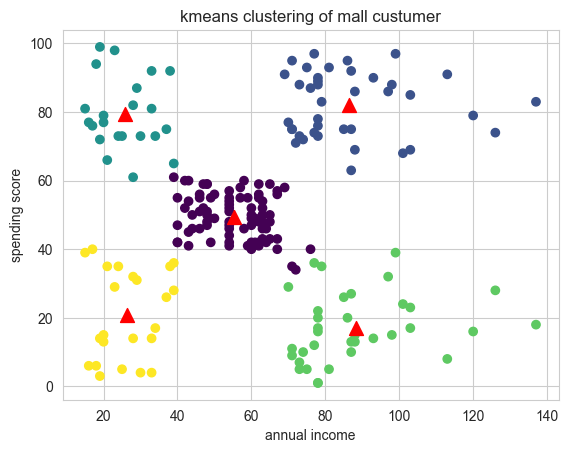

In [26]:
plt.scatter(x.iloc[:,0], x.iloc[:,1], c=pred, cmap='viridis',marker='o')
plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1], s=100,c='red',marker='^')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.title('kmeans clustering of mall custumer')
plt.show()

In [27]:
inertia = Kmeans.inertia_
silhoutte = silhouette_score(x,pred)

print('inertia:',inertia)
print('silhouette_score:',silhouette_score)

inertia: 44448.4554479337
silhouette_score: <function silhouette_score at 0x000001E1B6239D00>


In [28]:
new_point = [[60,50]]
predicted_cluster = Kmeans.predict(new_point)
print(f'the new point {new_point} belong to cluster {predicted_cluster[0]}')

the new point [[60, 50]] belong to cluster 0


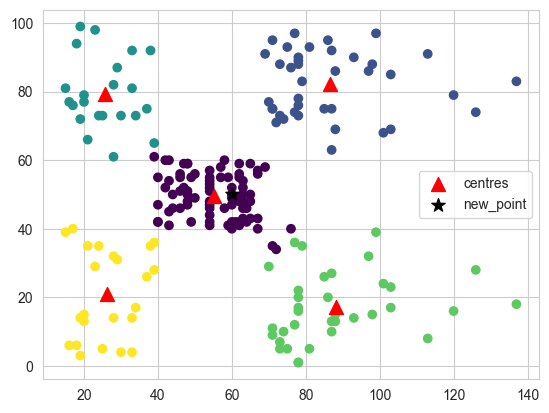

In [29]:
plt.scatter(x.iloc[:,0], x.iloc[:,1], c=pred, cmap='viridis',marker='o')
plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1], s=100,c='red',marker='^', label='centres')
plt.scatter(new_point[0][0],new_point[0][1],c='black',s=100,marker='*',label='new_point')
plt.legend()
plt.show()